In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# create path to folder
path = r'C:\Users\Halima\anaconda3\ach6'
# import dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'samplesuperstore.csv'),index_col = False)

In [3]:
#Define path 
path=(r"C:\Users\hardjan\Retail Supermarket")

In [5]:
# Importing Data set 
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'samplesuperstore1.csv'), index_col = False)

In [5]:
df.shape

(9994, 13)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2/27/2018
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,4/15/2015
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,6/12/2018
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,8/19/2015
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,1/13/2018


### 03. The Elbow technique 

In [10]:
df_numeric=df[['Quantity','Discount', 'Sales', 'Profit']]

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
df_numeric.columns.to_list()

['Quantity', 'Discount', 'Sales', 'Profit']

In [12]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4430069250.260376,
 -2466689485.446174,
 -1444371627.8233473,
 -1009021756.5951216,
 -815985985.4470421,
 -661086513.7128534,
 -565218872.4019842,
 -463374358.55900145,
 -388457525.650492]

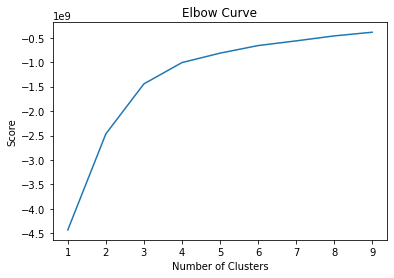

In [13]:
# plots the scores for each iteration, with varying number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:

kmeans = KMeans(n_clusters=3)

In [15]:
kmeans.fit(df_numeric)

KMeans(n_clusters=3)

In [16]:
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

C:\Users\Halima\AppData\Local\Temp\ipykernel_20740\2572733152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['cluster'] = kmeans.fit_predict(df_numeric)


In [17]:
df_numeric['cluster'].value_counts()

0    9511
2     468
1      15
Name: cluster, dtype: int64

In [18]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


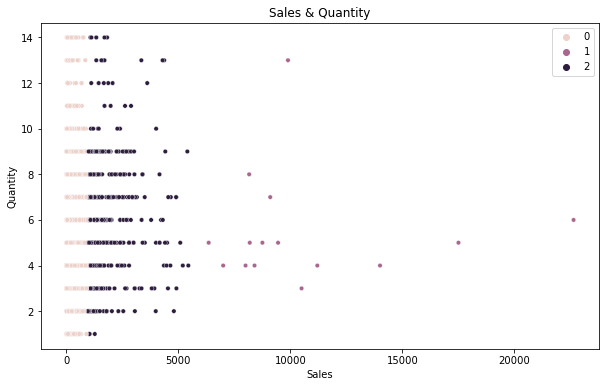

In [19]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Sales'], y=df_numeric['Quantity'], hue=kmeans.labels_, s=20)
plt.title('Sales & Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
ax.grid(False)
plt.show()

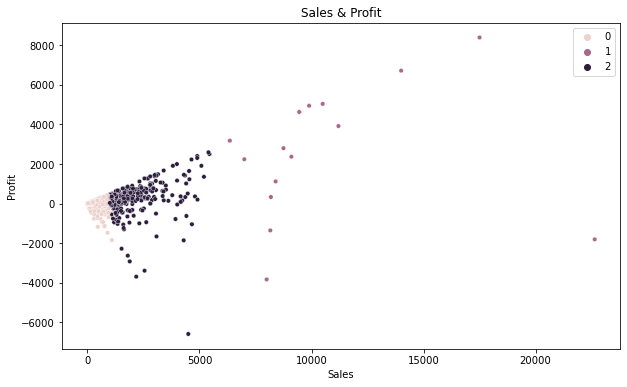

In [23]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Sales'], y=df_numeric['Profit'], hue=kmeans.labels_, s=20)
plt.title('Sales & Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
ax.grid(False)
plt.show()

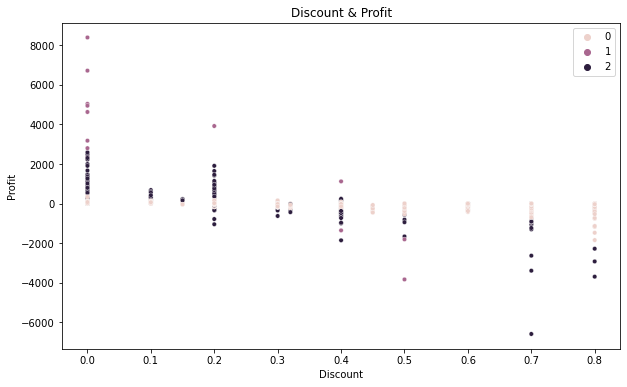

In [20]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Discount'], y=df_numeric['Profit'], hue=kmeans.labels_, s=20)
plt.title('Discount & Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
ax.grid(False)
plt.show()

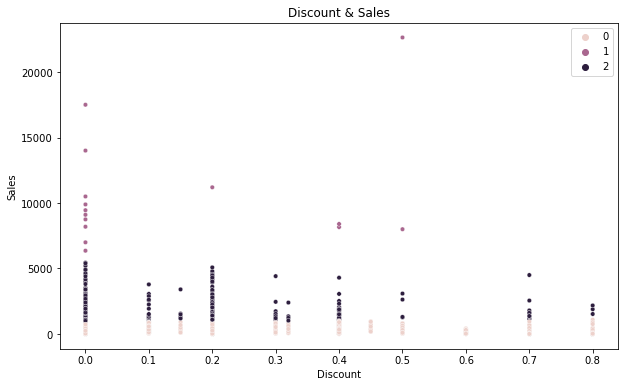

In [21]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Discount'], y=df_numeric['Sales'], hue=kmeans.labels_, s=20)
plt.title('Discount & Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
ax.grid(False)
plt.show()